In [ ]:
!pip install sklego
!pip install delayed
!pip install catboost

     |████████████████████████████████| 222 kB 27.3 MB/s 
     |████████████████████████████████| 80 kB 11.4 MB/s 
     |████████████████████████████████| 23.1 MB 51.6 MB/s 
     |████████████████████████████████| 1.1 MB 54.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=2ee0e013c750c2211ee1cc106354fb694eb0eb66392921ac0ad35f3b6bdc2bd7
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=171aefe1672df41e437804dc75938325e01ea9ff8e9f12f5b82d91da09dd0087
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.pos

     |████████████████████████████████| 85 kB 4.5 MB/s 
     |████████████████████████████████| 72 kB 560 kB/s 
     |████████████████████████████████| 76.4 MB 42 kB/s 


In [ ]:
from google.colab import files
files.upload()

Saving features.csv to features.csv
Saving response.csv to response.csv


{'features.csv': b'"names(response)","algeria","morocco","latitude","longitude","alt","dist_towns","dist_coast","area","ecosystem","dam","year","anomalies_t_print_NW","anomalies_print_NE","anomalies_hiv_SW","anomalies_hiv_SE","p_NW_Europe","p_NE_Europe","NAO","rain","economy","agri"\n"X19903",1,0,36.8310239,3.676811537,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593301435,2.70593301435407,36.3961578947368\n"X19904",1,0,33.49379641,5.990476626,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258373206,1.85397129186603,37.0175406698565\n"X19905",1,0,36.14790988,5.16352813,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148325359,1.82755980861244,37.3874736842105\n"X19906",1,0,35.1727718,7.031942274,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263157895,-1.00966507177034,37.5159186602871\n"X199012",1,0,35.72859277,2.80224066,629.23,5748

In [29]:
# import libraries

# tools
import pandas as pd
import numpy as np

# scaling
from sklearn.preprocessing import StandardScaler

# modeling
from sklego.meta import ZeroInflatedRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, PoissonRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
import catboost as cb
from catboost import CatBoostRegressor
from xgboost.sklearn import XGBRegressor
import xgboost as XGB
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB
# cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split

# metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score,KFold

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
features = pd.read_csv('features.csv')
response = pd.read_csv('response.csv')

In [ ]:
print(features.shape)
features.head()

(3958, 22)


,names(response),algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri
0,X19903,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158
1,X19904,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541
2,X19905,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474
3,X19906,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919
4,X199012,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043


In [ ]:
print(response.shape)
response.head()

(3958, 2)


,Unnamed: 0,x
0,X19903,2
1,X19904,0
2,X19905,4
3,X19906,0
4,X199012,0


In [ ]:
# concatenate the two datasets
data = pd.merge(features ,response , 
                left_on = 'names(response)' , 
                right_on = 'Unnamed: 0')
data.drop(['names(response)' , 'Unnamed: 0'] , axis = 1 , inplace = True)
data.head()

,algeria,morocco,latitude,longitude,alt,dist_towns,dist_coast,area,ecosystem,dam,year,anomalies_t_print_NW,anomalies_print_NE,anomalies_hiv_SW,anomalies_hiv_SE,p_NW_Europe,p_NE_Europe,NAO,rain,economy,agri,x
0,1,0,36.831024,3.676812,12.23,8121.33,2077.128,0.064,3,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,261.164593,2.705933,36.396158,2
1,1,0,33.493796,5.990477,40.08,2345.41,434513.588,0.343,2,0,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,263.494258,1.853971,37.017541,0
2,1,0,36.147910,5.163528,849.96,17563.14,69422.228,15.399,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,223.941148,1.827560,37.387474,4
3,1,0,35.172772,7.031942,935.64,8203.38,235988.172,5.334,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,197.605263,-1.009665,37.515919,0
4,1,0,35.728593,2.802241,629.23,5748.02,122453.152,23.814,3,1,1990,0.64,0.92,0.62,0.17,55.93,42.45,-0.21,203.566507,2.771483,37.694043,0


In [ ]:
# all numeric, no missing values
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3957
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   algeria               3958 non-null   int64  
 1   morocco               3958 non-null   int64  
 2   latitude              3958 non-null   float64
 3   longitude             3958 non-null   float64
 4   alt                   3958 non-null   float64
 5   dist_towns            3958 non-null   float64
 6   dist_coast            3958 non-null   float64
 7   area                  3958 non-null   float64
 8   ecosystem             3958 non-null   int64  
 9   dam                   3958 non-null   int64  
 10  year                  3958 non-null   int64  
 11  anomalies_t_print_NW  3958 non-null   float64
 12  anomalies_print_NE    3958 non-null   float64
 13  anomalies_hiv_SW      3958 non-null   float64
 14  anomalies_hiv_SE      3958 non-null   float64
 15  p_NW_Europe          

In [ ]:
data.x.describe()

count     3958.000000
mean       415.286761
std       1905.565491
min          0.000000
25%          0.000000
50%          4.000000
75%        151.500000
max      81950.000000
Name: x, dtype: float64

##Data visualization

For this section, we are gonna try to perceive whether or not, exist a normality distribution for our indepandants variables, as follows:

In [ ]:
def diagnostic_plots(data, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)

    plt.show()

In [ ]:
def split_plots(n):
  #split plots
  string = ''
  for i in range(n):
    string+= '-'
  return string

histogram and Q-Q plot for algeria variable


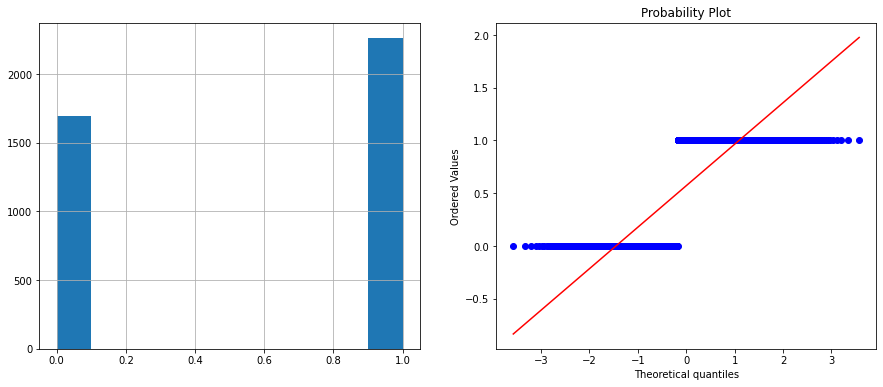

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for morocco variable


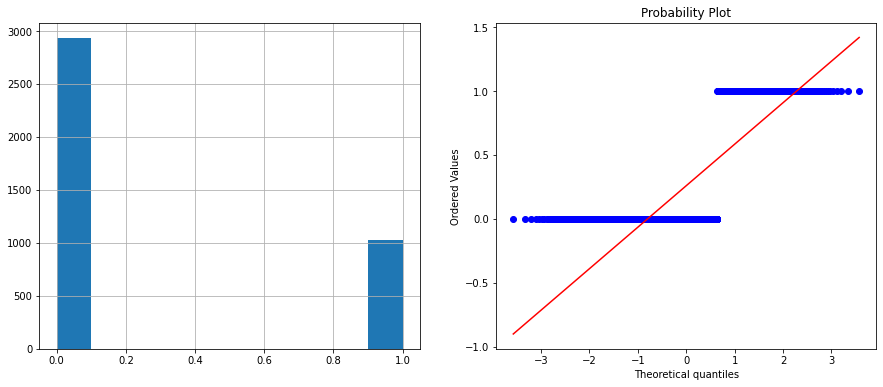

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for latitude variable


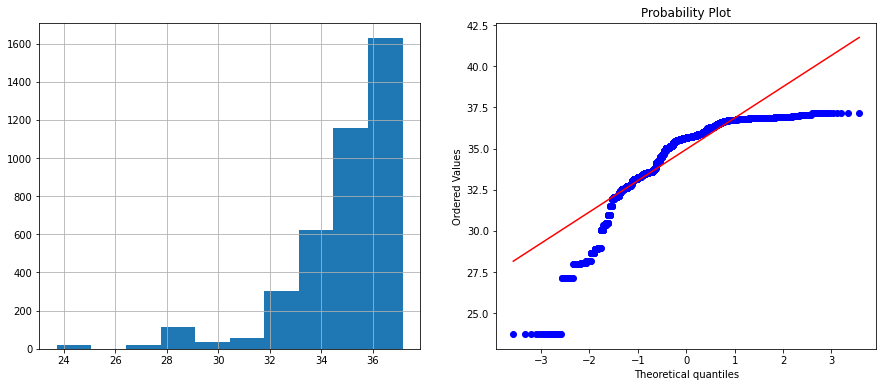

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for longitude variable


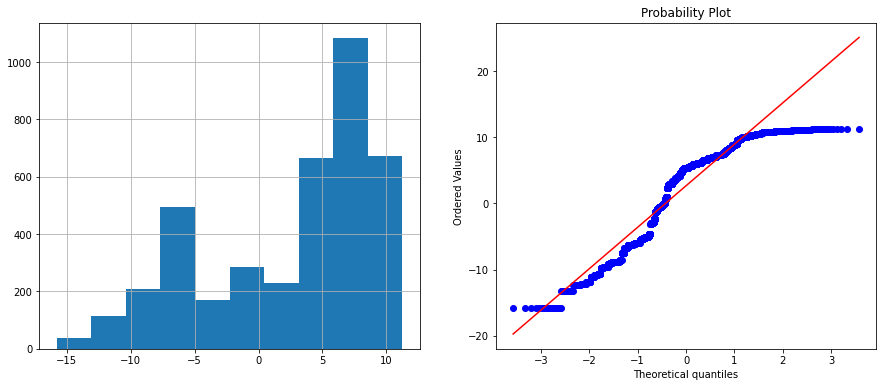

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for alt variable


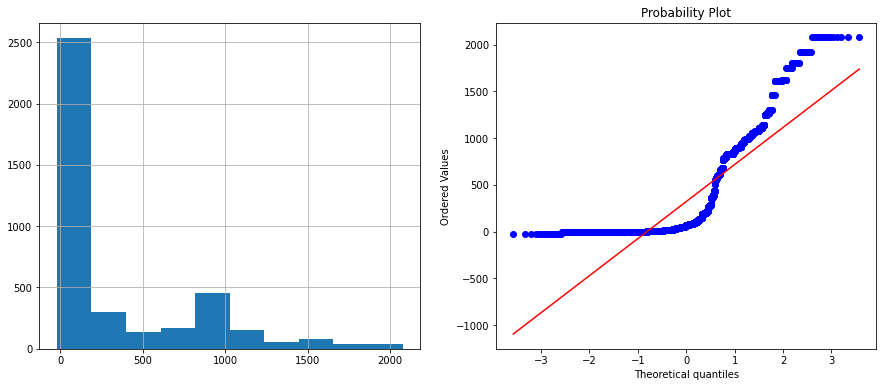

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for dist_towns variable


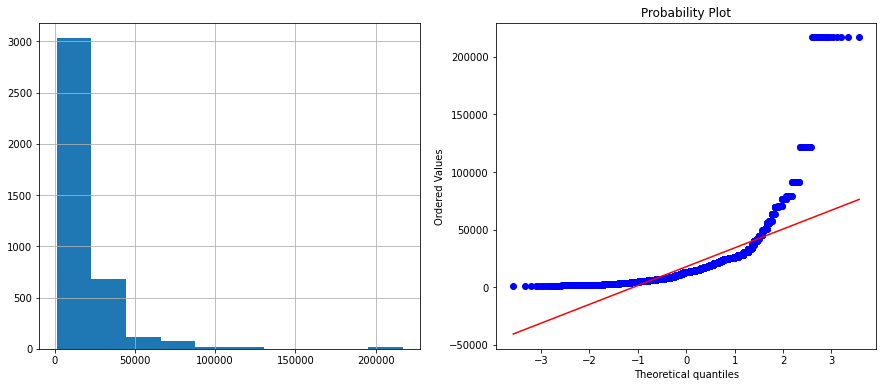

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for dist_coast variable


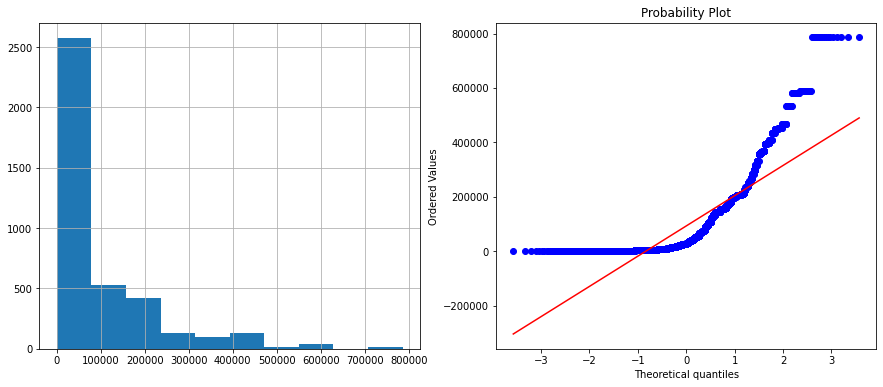

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for area variable


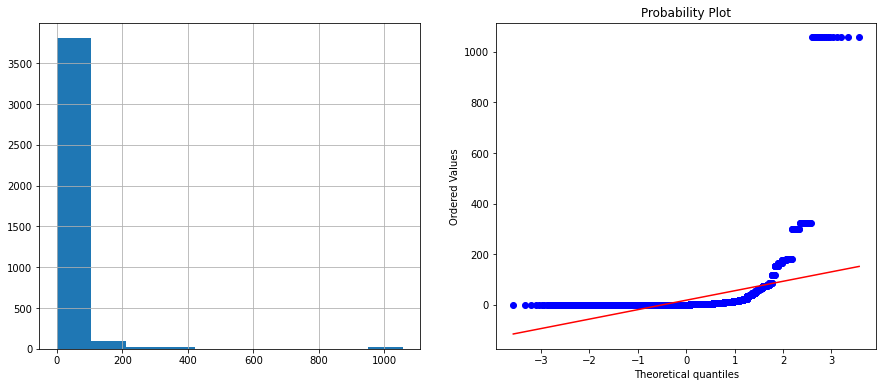

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for ecosystem variable


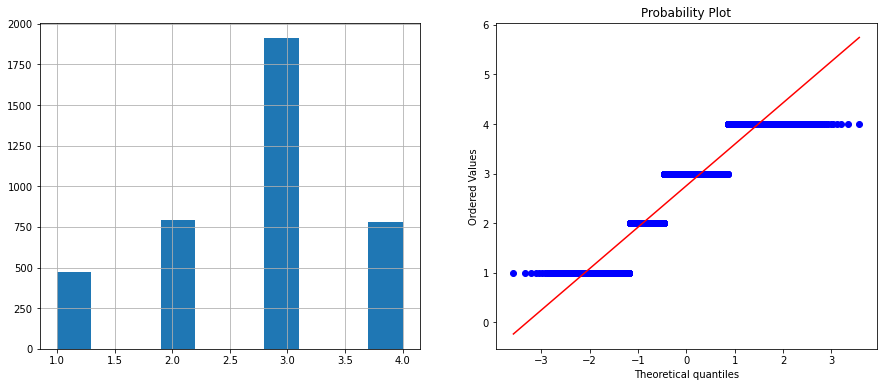

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for dam variable


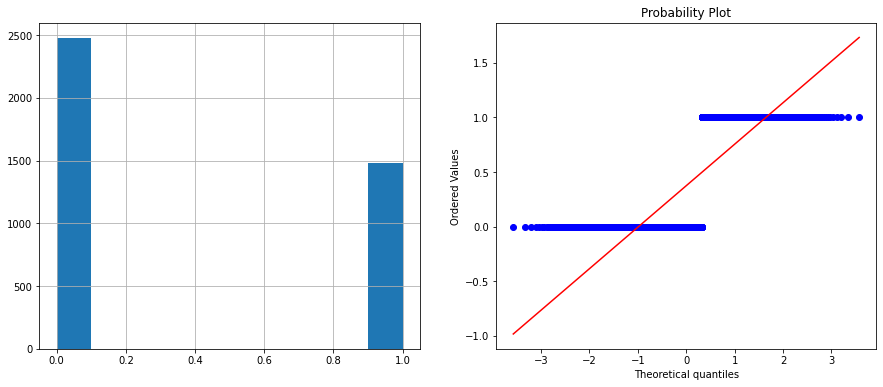

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for year variable


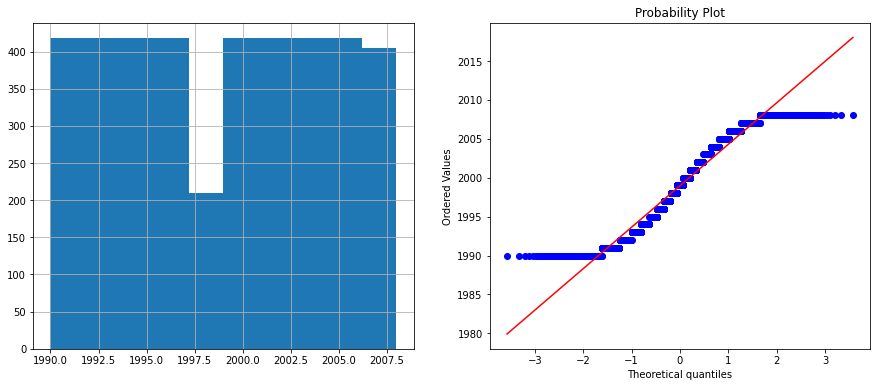

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_t_print_NW variable


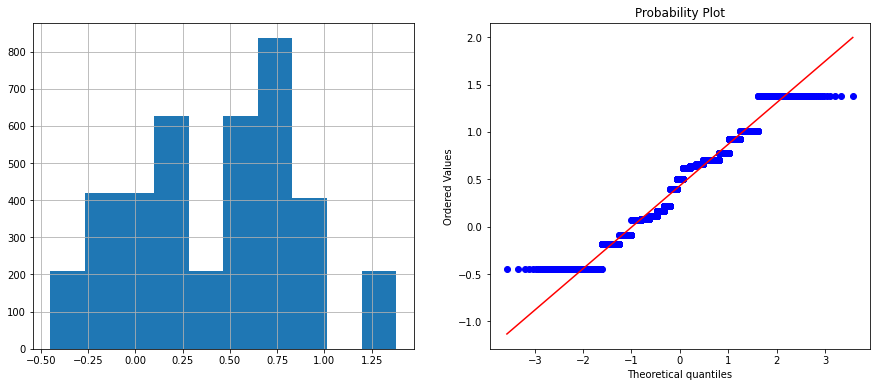

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_print_NE variable


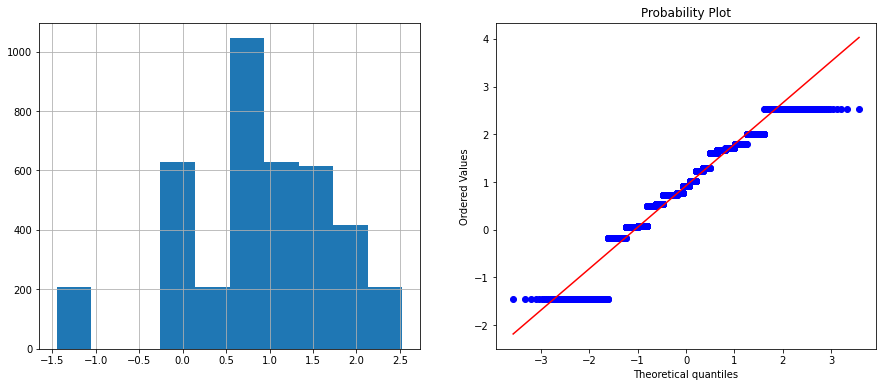

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_hiv_SW variable


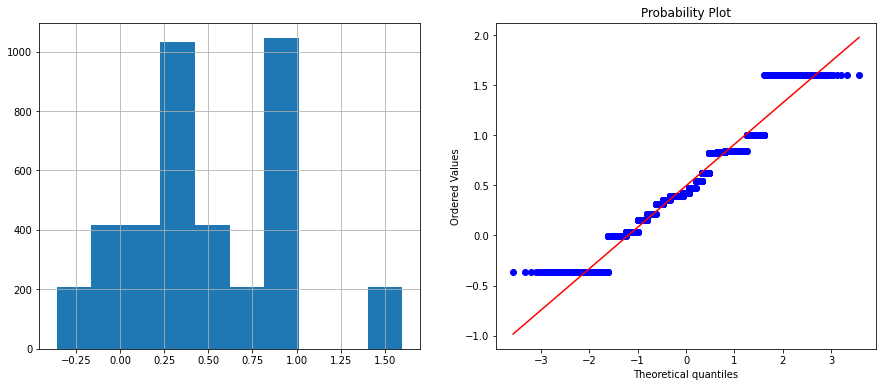

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for anomalies_hiv_SE variable


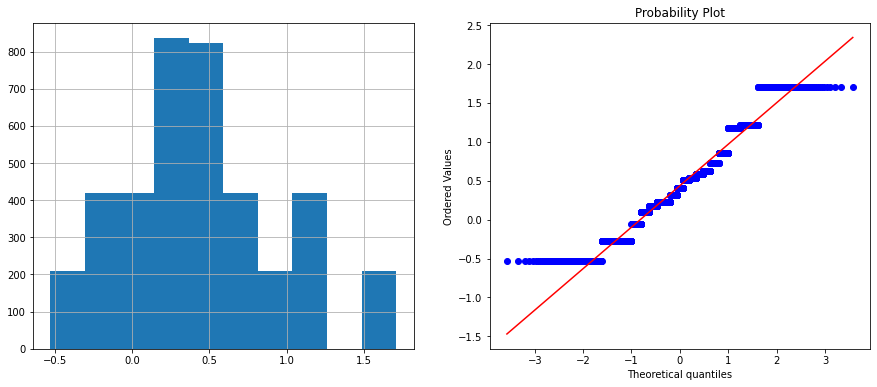

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for p_NW_Europe variable


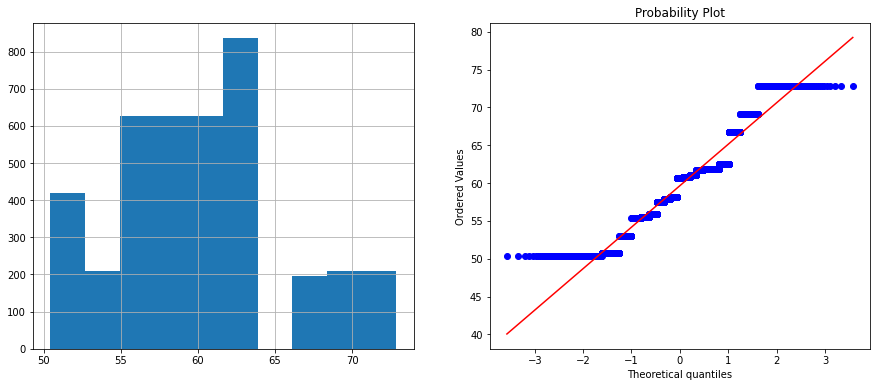

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for p_NE_Europe variable


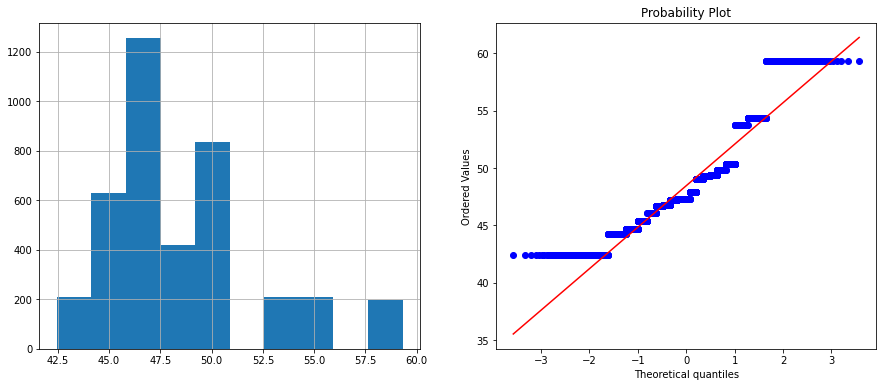

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for NAO variable


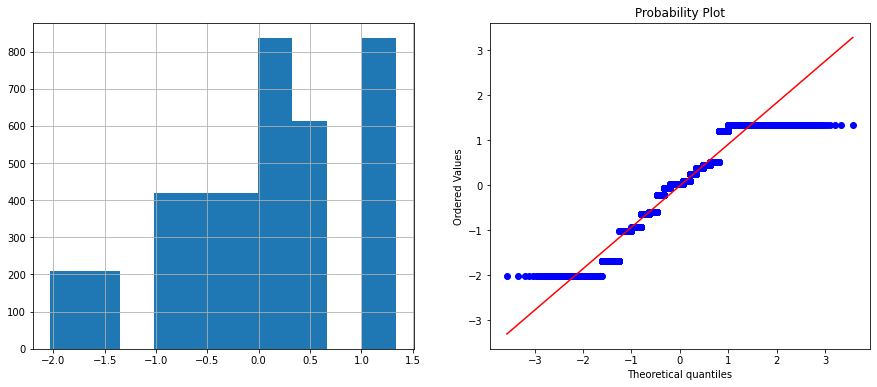

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for rain variable


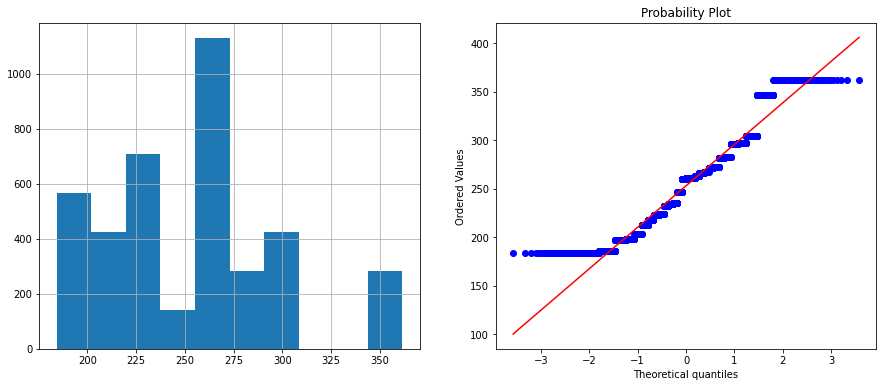

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for economy variable


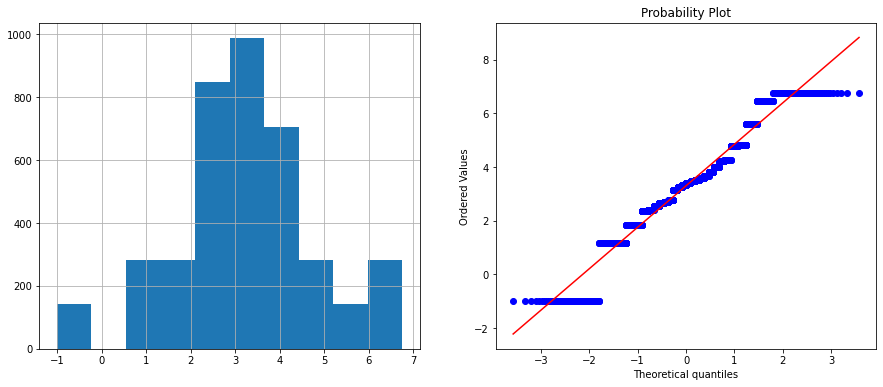

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for agri variable


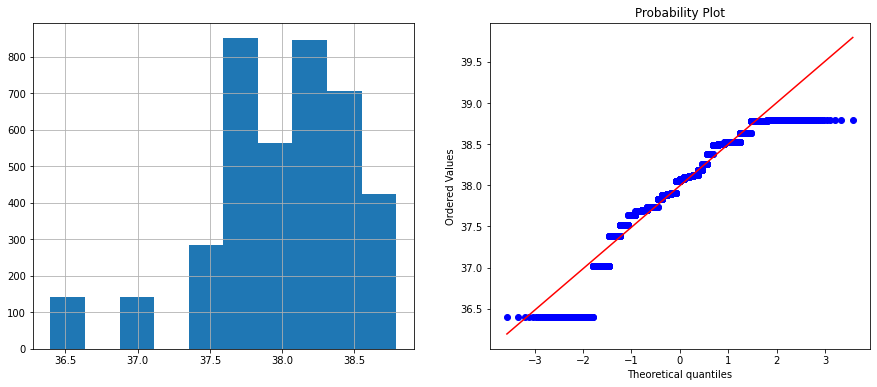

------------------------------------------------------------------------------------------------------------------------
histogram and Q-Q plot for x variable


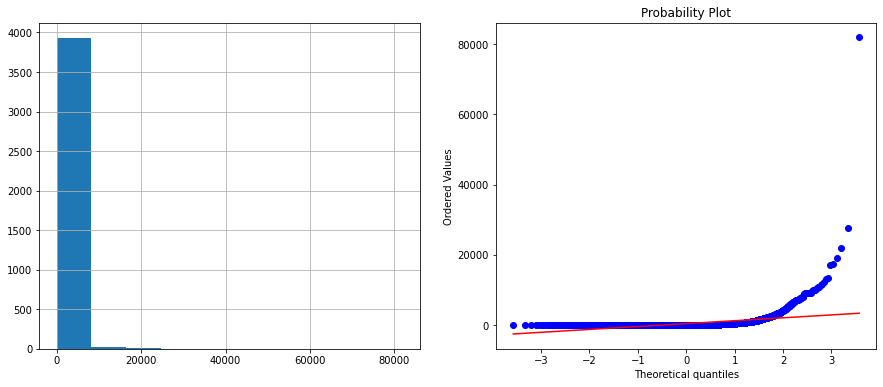

------------------------------------------------------------------------------------------------------------------------


In [ ]:
from scipy import stats
for i in list(data.select_dtypes(include=np.number).columns):
  print('histogram and Q-Q plot for ' + i + ' variable')
  diagnostic_plots(data, i)
  print(split_plots(120))

The indepandants variables do not show any normality pattern, thing that can be noticed from plots above, since Q-Q plots do not urge to any fitting between a particular variable and the y = x line. That said, the best thing to think about in this regard is to look for transformation in such a manner to get this normality pattern for our variables, since then, we are likely gonna be using see if the transformation is worth it or not for the performance log transformation latter on.

The scatter plots are showing the relationship between langitude and latitude while doing the hue with county (Morocco, Algeria) without forgeting the fact that each point is representing a geographical point and its size fitted its value in the column x 

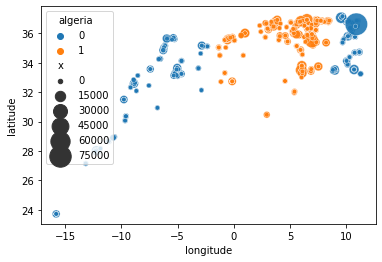

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'algeria' , data = data, size='x' , sizes=(20,500) , alpha=0.9)

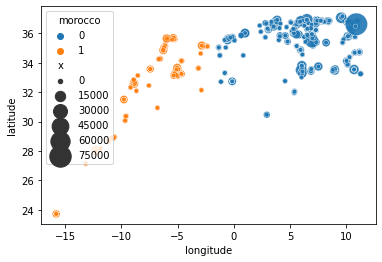

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'morocco' , data = data, size='x' , sizes=(20,500) , alpha=0.9)

Through the visualization of the two countries, we can recognize that some observations are representing by the couple (0,0) in the dataset, thing that is not raisonnable to take it into account, since the survey we are tackling consider the survey for algeria and morocco, However, the plot below is showing that some points are somewhat out of algeria, that is why we decided to create a new column with "tunisie" as the name of the new feature 

In [ ]:
data_tunisie = data.copy()
data_tunisie['tunisie'] = data[data['algeria'] != data['morocco']]

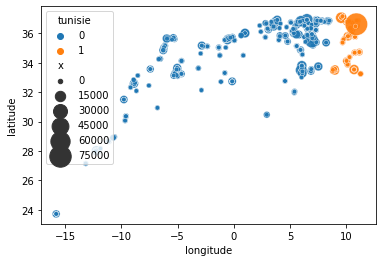

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'tunisie' , data = data_tunisie , size='x' , sizes=(20,500) , alpha=0.9)

After this plot, we can notice that "tunisie" points are taking a large size, means those points corresponding to points with a large value for x (target). Thus, adding a new variable do not help in any manner to achieve a good performance

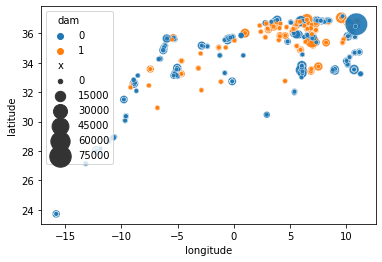

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'dam' , data = data, size='x' , sizes=(20,500) , alpha=0.9)

We then also tried to have information about whether or not the site is a dam, and also how the size point is changing throughout dam's locations

<Figure size 720x432 with 0 Axes>

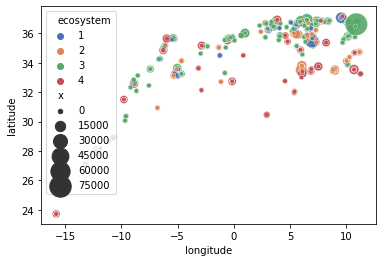

<Figure size 720x432 with 0 Axes>

In [ ]:
sns.scatterplot(x = 'longitude' , y = 'latitude' , hue= 'ecosystem' , data = data ,  palette="deep" , size='x' , sizes=(20,500) , alpha=0.9)
plt.figure(figsize=(10,6))

Information about how the ecosystems groups are scattered over Algeria and Morocco

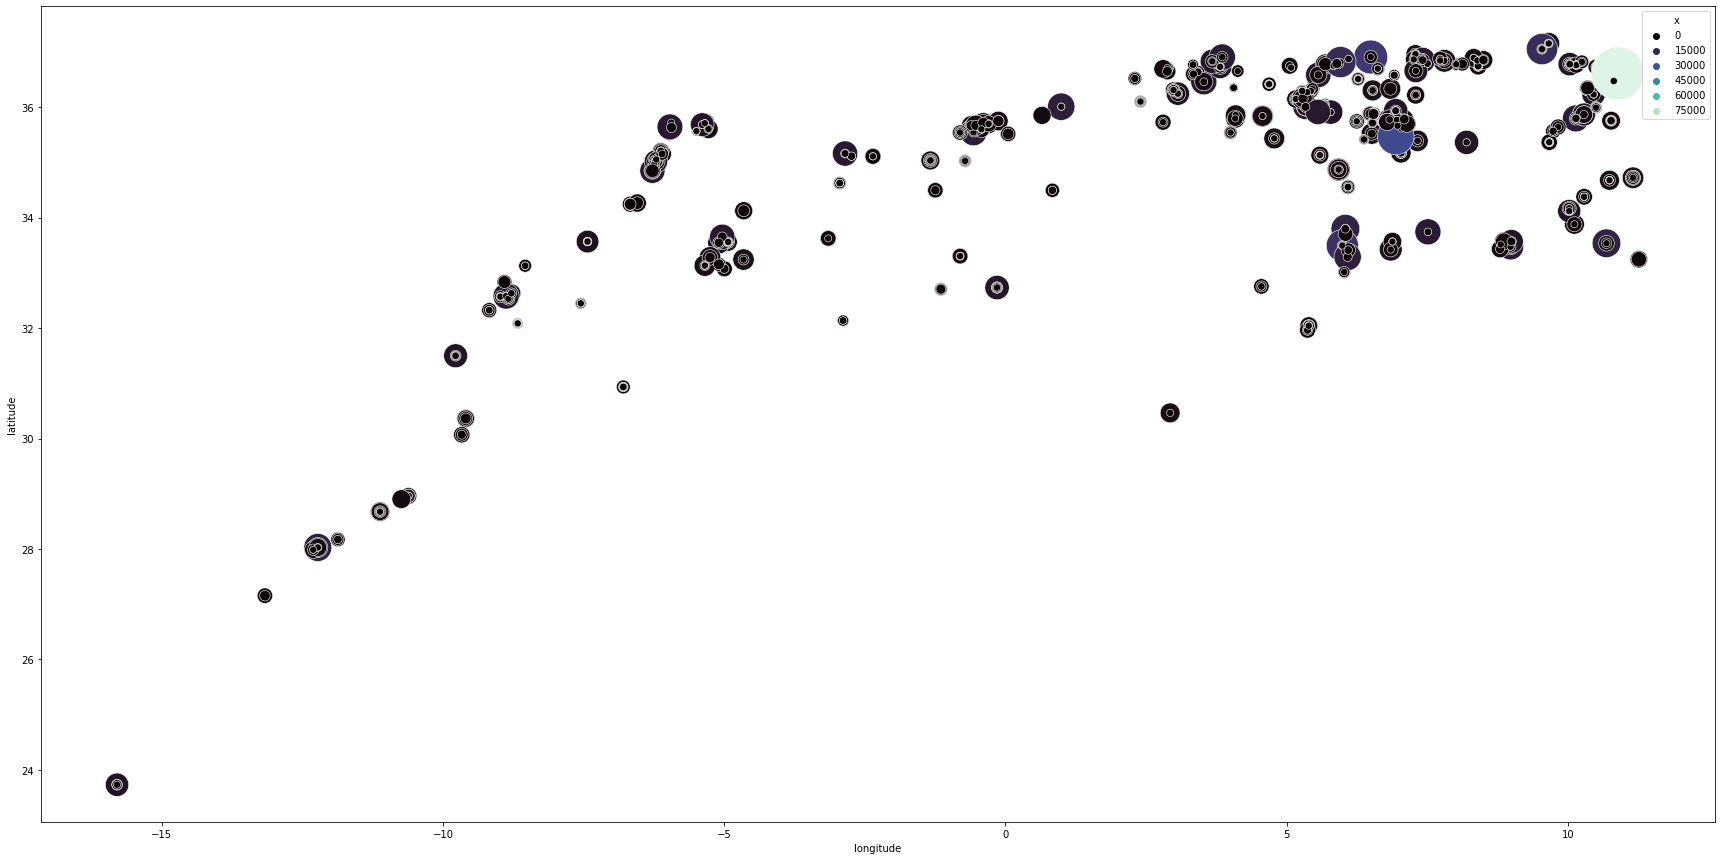

In [ ]:
plt_1 = plt.figure(figsize=(30, 15))
sns.scatterplot(data = data, x = "longitude", y = "latitude",hue=data.x,s =data.x.apply(lambda y: y**0.7+50),palette = 'mako')

In [ ]:
data_notunisia = data[data['algeria'] != data['morocco']]

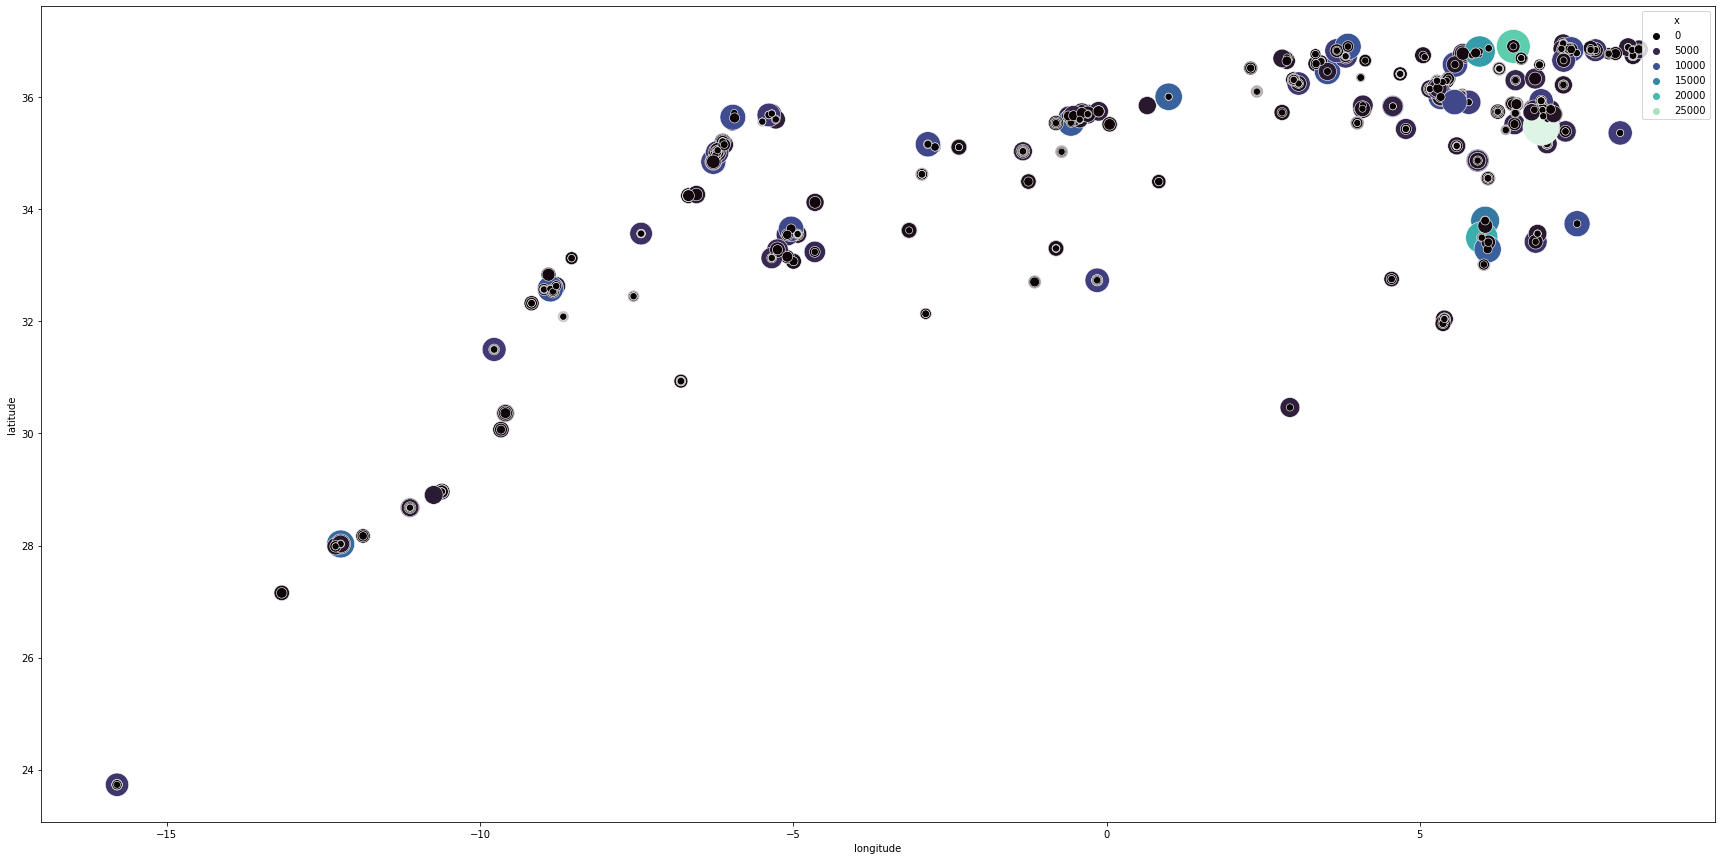

In [ ]:
plt_1 = plt.figure(figsize=(30, 15))
sns.scatterplot(data = data_notunisia, x = "longitude", y = "latitude",hue=data_notunisia.x,s =data_notunisia.x.apply(lambda y: y**0.7+50),palette = 'mako')

Distribution of Algeria:


<Figure size 720x432 with 0 Axes>

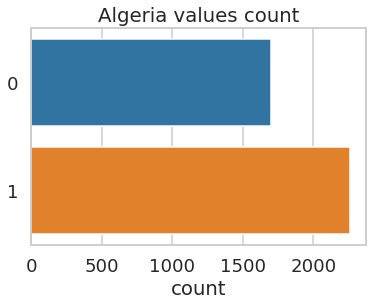

<Figure size 720x432 with 0 Axes>

In [ ]:
ax = sns.countplot(y=data.algeria.values).set(title='Algeria values count')

print('Distribution of Algeria:')
np.round(data.algeria.value_counts()/data.shape[0] , 3)
plt.figure(figsize=(10,6))

Distrubition of Morocco


0    0.741
1    0.259
Name: morocco, dtype: float64

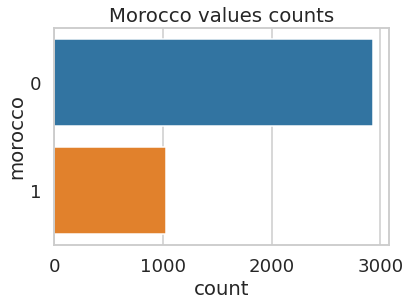

In [ ]:
ax = sns.countplot(y=data.morocco).set(title = 'Morocco values counts')

print('Distrubition of Morocco')
np.round(data.morocco.value_counts()/data.shape[0] , 3)

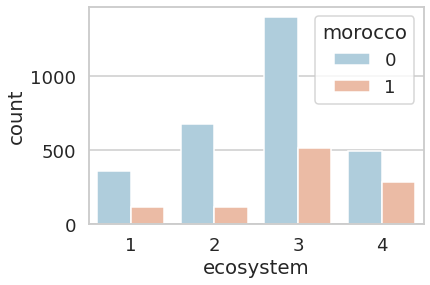

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='ecosystem' ,hue='morocco',data=data ,palette='RdBu_r')

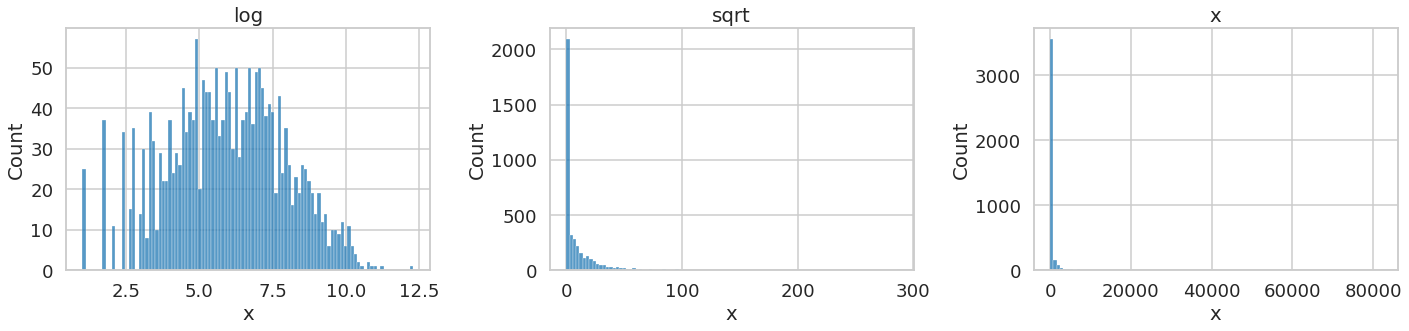

In [ ]:
f , axes = plt.subplots(1,3, figsize=(20,5))
#log transformation seems to be the best
sns.histplot(data.x.apply(lambda x : np.log(x) + 1) , bins = 100, ax=axes[0]).set(title = 'log')
sns.histplot(np.sqrt(data.x) , bins = 100, ax=axes[1]).set(title = 'sqrt')
sns.histplot(data.x , bins = 100, ax=axes[2]).set(title = 'x')



f.tight_layout()

We perceive a high skewness toward the target variable, so we do need to lessen this skewness for our favor in data modeling

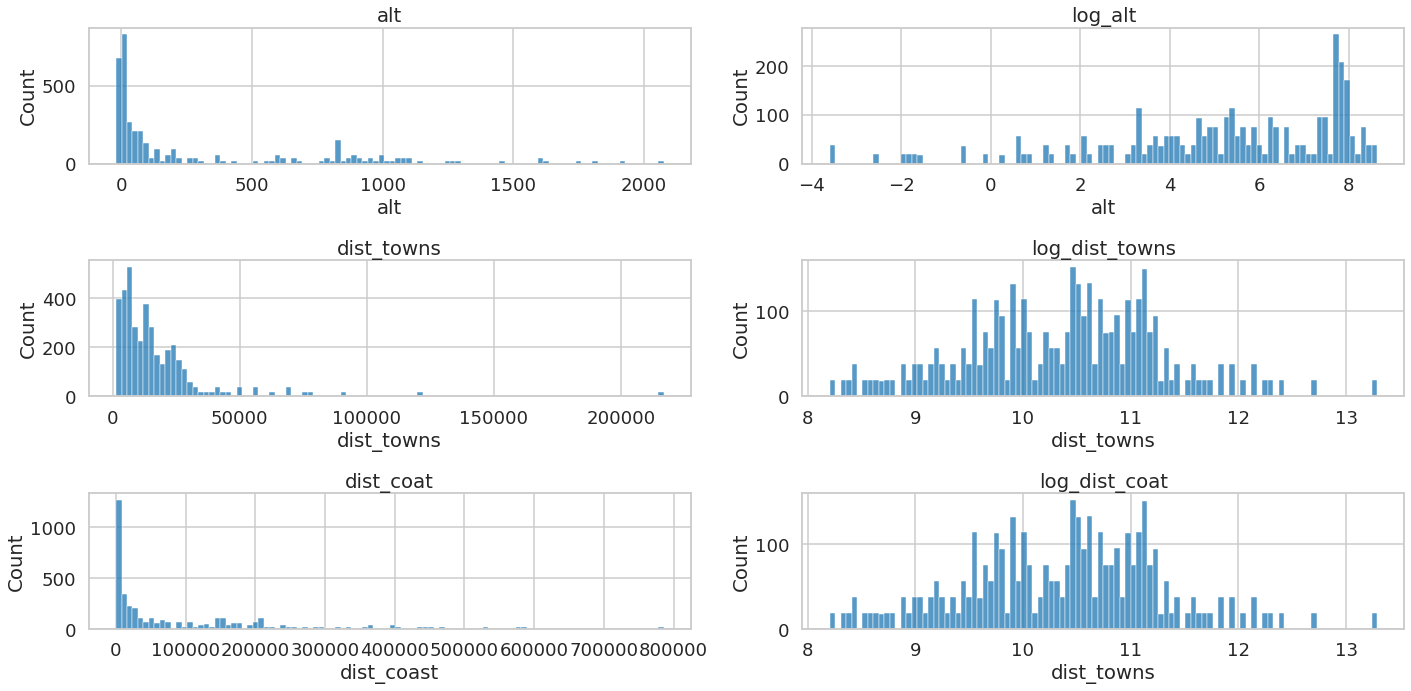

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(20,10))
# epsilon = 0.01

sns.histplot(data.alt, bins = 100, ax=axes[0][0]).set(title='alt')
sns.histplot(data.alt.apply(lambda x : np.log(x) + 1), bins = 100, ax=axes[0][1]).set(title='log_alt')

sns.histplot(data.dist_towns, bins = 100, ax=axes[1][0]).set(title='dist_towns')
sns.histplot(data.dist_towns.apply(lambda x : np.log(x) + 1), bins = 100, ax=axes[1][1]).set(title='log_dist_towns')

sns.histplot(data.dist_coast,  bins = 100, ax=axes[2][0]).set(title='dist_coat')
sns.histplot(data.dist_towns.apply(lambda x : np.log(x) + 1),  bins = 100, ax=axes[2][1]).set(title='log_dist_coat')

f.tight_layout()

For the case of alt we do have a left skewness that refers to the fact that the median is bigger than the mean thing the we will be handling using 

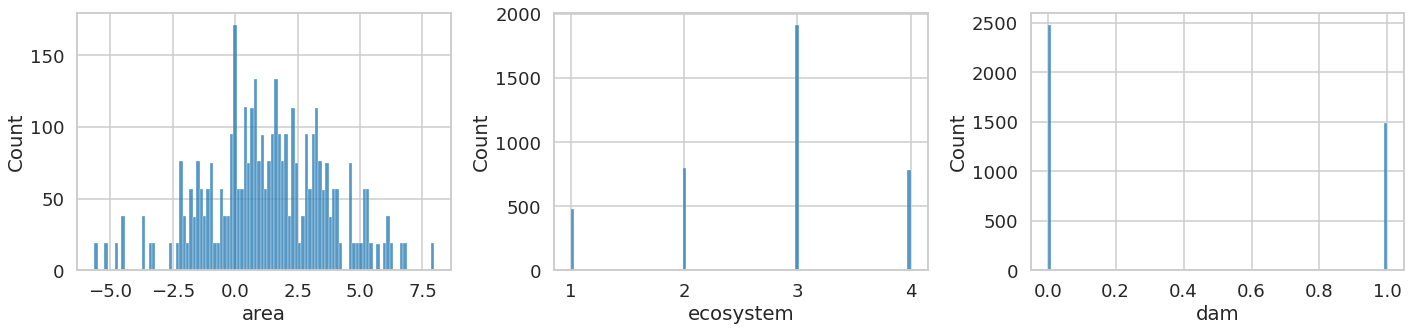

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.area.apply(lambda x : np.log(x) + 1), bins = 100, ax=axes[0])
sns.histplot(data.ecosystem, bins = 100, ax=axes[1])
sns.histplot(data.dam,  bins = 100, ax=axes[2])

f.tight_layout()

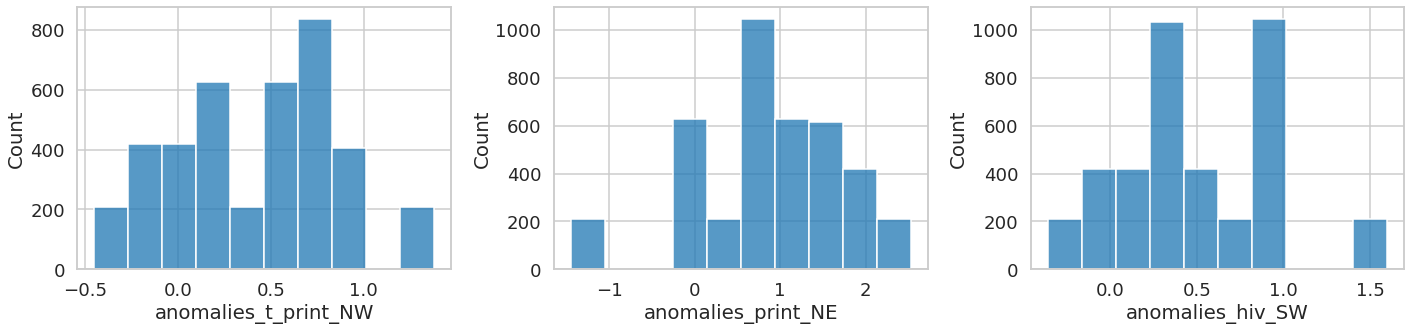

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.anomalies_t_print_NW, bins = 10, ax=axes[0])
sns.histplot(data.anomalies_print_NE,  bins = 10, ax=axes[1])
sns.histplot(data.anomalies_hiv_SW,  bins = 10, ax=axes[2])

f.tight_layout()

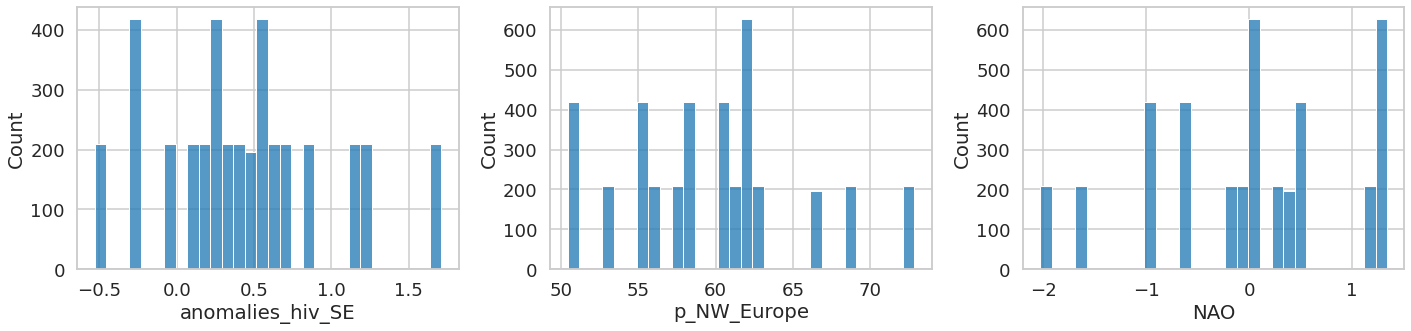

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.anomalies_hiv_SE, bins = 30, ax=axes[0])
sns.histplot(data.p_NW_Europe,  bins = 30, ax=axes[1])
sns.histplot(data.NAO,  bins = 30, ax=axes[2])

f.tight_layout()

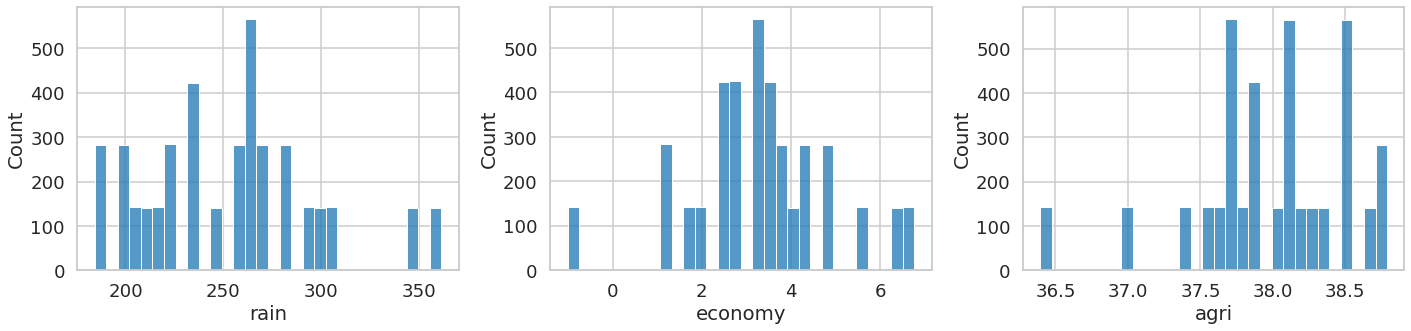

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.histplot(data.rain, bins = 30, ax=axes[0])
sns.histplot(data.economy,  bins = 30, ax=axes[1])
sns.histplot(data.agri,  bins = 30, ax=axes[2])

f.tight_layout()

In [ ]:
#remove tunisia values since we r interested in Morocco&Algeria data
data = data.drop(data[(data.algeria == 0) & (data.morocco == 0)].index)
data.x.describe()

## **Zero-inflated modeling** :
**The Problem with Zero-Inflated Data**

Many models can get distracted by such behavior, among them linear regression, support vector machines, and also neural networks. The chance that one of these models outputs a zero is quite small.

**The Zero-Inflated Regressor**
We will now define an estimator that solves the problems related to zero-inflated datasets. If a data point goes into the model, the classifier first checks if the output should be zero. If yes, output zero. Otherwise, output the result of the regressor for this data point.

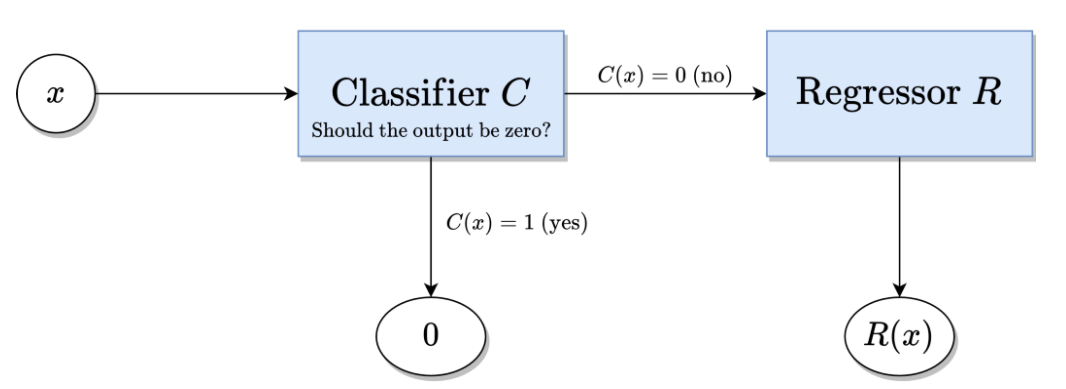

This is what we call a meta-model, i.e. a model that consists of other models.
In the following analysis, we will work with 2 classifiers: SVM and Naive Bayes, these classifiers will be pluged in a pipeline with different regressors.


In [ ]:
# Data splitting
X = data.drop(['x'],axis = 1)
y = data.x
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=True, random_state=42)

In [ ]:
# scaling features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Linear models with Zero-inflated regression**
We will work with Linear Regression and Poisson Regression using Support vector & naive bayes classifiers.

we will perform hyperparamter tunning only on the best model.




####Linear regression

In [ ]:
# Instantiate the zero-inflated regressor with SVC
ZIR_1 = ZeroInflatedRegressor(
    classifier=SVC(),
    regressor= LinearRegression())

# Easy fit!
model_1 = ZIR_1.fit(X_train, y_train) 

# predict target
y_predict_1 = model_1.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict_1)

541.7335943824354

In [ ]:
# Instantiate the zero-inflated regressor with NB classifier
ZIR_2 = ZeroInflatedRegressor(
    classifier=GaussianNB(),
    regressor= LinearRegression())

# Easy fit!
model_2 = ZIR_2.fit(X_train, y_train) 

# predict target
y_predict_2 = model_2.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict_2)

535.3873699249127

####Poisson regression

In [ ]:
# Instantiate the zero-inflated regressor with SVC
ZIR_1 = ZeroInflatedRegressor(
    classifier=SVC(),
    regressor= PoissonRegressor())

# Easy fit!
model_1 = ZIR_1.fit(X_train, y_train) 

# predict target
y_predict_1 = model_1.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict_1)

542.2041890415326

In [ ]:
# Instantiate the zero-inflated regressor with NB classifier
ZIR_2 = ZeroInflatedRegressor(
    classifier=GaussianNB(),
    regressor= PoissonRegressor())

# Easy fit!
model_2 = ZIR_2.fit(X_train, y_train) 

# predict target
y_predict_2 = model_2.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict_2)

535.8019478656845

#### Support vector machine regressor

In [21]:
# Instantiate the zero-inflated regressor with NB classifier
ZIR_2 = ZeroInflatedRegressor(
    classifier=GaussianNB(),
    regressor= SVR())

# Easy fit!
model_2 = ZIR_2.fit(X_train, y_train) 

# predict target
y_predict_2 = model_2.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict_2)

360.35646540084605

In [38]:
# Instantiate the zero-inflated regressor with NB classifier
ZIR_2 = ZeroInflatedRegressor(
    classifier=SVC(),
    regressor= SVR())

# Easy fit!
model_2 = ZIR_2.fit(X_train, y_train) 

# predict target
y_predict_2 = model_2.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict_2)

361.6014727960772

In [ ]:
# Instantiate the zero-inflated SVR regressor with SVC ( best than NB classifier)
ZIR_1 = ZeroInflatedRegressor(
    classifier=SVC(),
    regressor= SVR(kernel='rbf'))


mod = GridSearchCV(estimator=ZIR_1,
                   param_grid = { 'classifier__C':[0.1,1,10],'classifier__degree':[1,2],'classifier__gamma': [0.001, 0.0001],
                                 'regressor__C':[0.1,1,10],'regressor__degree':[1,2],'regressor__gamma': [0.001, 0.0001]
                                  
                   },
                   scoring={"mae": make_scorer(mean_absolute_error)}, refit = "mae",
                   cv=5, verbose = 1)

mod.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=ZeroInflatedRegressor(classifier=SVC(), regressor=SVR()),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__degree': [1, 2],
                         'classifier__gamma': [0.001, 0.0001],
                         'regressor__C': [0.1, 1, 10],
                         'regressor__degree': [1, 2],
                         'regressor__gamma': [0.001, 0.0001]},
             refit='mae', scoring={'mae': make_scorer(mean_absolute_error)},
             verbose=1)

In [ ]:
ZIR_1.get_params().keys()

dict_keys(['classifier__C', 'classifier__break_ties', 'classifier__cache_size', 'classifier__class_weight', 'classifier__coef0', 'classifier__decision_function_shape', 'classifier__degree', 'classifier__gamma', 'classifier__kernel', 'classifier__max_iter', 'classifier__probability', 'classifier__random_state', 'classifier__shrinking', 'classifier__tol', 'classifier__verbose', 'classifier', 'regressor__C', 'regressor__cache_size', 'regressor__coef0', 'regressor__degree', 'regressor__epsilon', 'regressor__gamma', 'regressor__kernel', 'regressor__max_iter', 'regressor__shrinking', 'regressor__tol', 'regressor__verbose', 'regressor'])

In [ ]:
mod.best_params_

{'classifier__C': 10,
 'classifier__degree': 1,
 'classifier__gamma': 0.001,
 'regressor__C': 0.1,
 'regressor__degree': 1,
 'regressor__gamma': 0.0001}

In [26]:
# model with best params
model_1 = ZeroInflatedRegressor(
    classifier=SVC(C = 10, degree=1,gamma=0.001),
    regressor= SVR(kernel='rbf', C=0.1,degree=1,gamma=0.0001) )

model_1.fit(X_train,y_train)

ZeroInflatedRegressor(classifier=SVC(C=10, degree=1, gamma=0.001),
                      regressor=SVR(C=0.1, degree=1, gamma=0.0001))

In [27]:
# predict target
y_predict_1 = model_1.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict_1)

360.39021473941676

In [37]:
# cross validate

cv = KFold(n_splits=5, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model_1, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (np.abs(np.mean(scores)), np.std(scores)))

MAE: 398.692 (60.696)


## **Tree based and bagging models**
We will work with Decisiontrees & Extratrees regressors and Random forest. These models should be able to deal with zero-inflated datasets as well so we dont have to introduce Zero-inflated regression as we did for Linear models. We decided to not tune hyperparameters for these models since the MAE didnt reach the best score we could achieve (MAE ~ 360) and hyperparamaters tunning wont improve these models that much.

### DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor()
# Easy fit!
model = regressor.fit(X_train, y_train) 

# predict target
y_predict = model.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict)

846.3768996960487

### ExtraTreesRegressor

In [ ]:
regressor= ExtraTreesRegressor()
# Easy fit!
model = regressor.fit(X_train, y_train) 

# predict target
y_predict = model.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict)

671.3341236068896

### Random *Forest*

In [ ]:
regressor= RandomForestRegressor()
# Easy fit!
model = regressor.fit(X_train, y_train) 

# predict target
y_predict = model.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict)

684.2991793313071

## **Boosting models**

We will work with GradientBoosting, Adaboost, XGBoost, CatBoost and LightGBM. These models should be able to deal with zero-inflated datasets as well, so we dont have to introduce Zero-inflated regression as we did for Linear models. We choose to tune only Adaboost, XGBoost and Catboost using GridSearchCV.

For evaluation metric, we are going with MAE. Note that, we specified Poisson regression as objective (when it s possible) given that it is prefered for count data problems ( reference : Estimation of species relative abundances and habitat preferences using opportunistic data article)

### Gradient Boosting

In [ ]:
regressor= GradientBoostingRegressor()
# Easy fit!
model = regressor.fit(X_train, y_train) 

# predict target
y_predict = model.predict(X_test)

# model performance
mean_absolute_error(y_test,y_predict)

615.470360976865

### AdaBoost 

In [ ]:
ada= AdaBoostRegressor(SVR(kernel='rbf'))
# Easy fit!
ADA = ada.fit(X_train, y_train, eval_metric = "mae") 

# predict target
y_predict = ADA.predict(X_test)

# ADA performance
mean_absolute_error(y_test,y_predict)

360.3158504367823

In [ ]:
#List Hyperparameters that we want to tune.
n_estimators = [10,100,200,300]
learning_rate  = [0.01,0.1,0.5]
loss  = ['linear', 'square', 'exponential']


#hyperparametres
hyperparameters = dict(learning_rate = learning_rate,
                      n_estimators = n_estimators,
                       loss = loss)

#the model
ADA = AdaBoostRegressor(SVR(kernel='rbf',C=1))

#the best model
clf = GridSearchCV(ADA, hyperparameters , cv=5 , n_jobs = -1 , verbose = 1)

#ya fitini
best_model = clf.fit(X_train, y_train)

#print the best parametres
print('Best n_estimators : ' ,best_model.best_estimator_.get_params()['n_estimators'])
print('Best learning_rate : ' ,best_model.best_estimator_.get_params()['learning_rate'])
print('Best loss:', best_model.best_estimator_.get_params()['loss'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


### XGBoost with Poisson regression

In [ ]:
DM_train = XGB.DMatrix(data = X_train, 
                       label = y_train)
					   
DM_test =  XGB.DMatrix(data = X_test,
                       label = y_test)

In [ ]:
xgb = XGBRegressor(objective ='count:poisson', eval_metric = 'mae')# poisson regression for count data
params = {
    "colsample_bytree": [0.3,0.5,0.7],
    "learning_rate": [0.03, 0.05, 0.1,0.5],  
    "max_depth": [5, 6, 7,10],
    "n_estimators": [10,50,100,500], 
    "subsample": [0.5,0.7]
}

xgb_grid = GridSearchCV(xgb,
                        params,
                        cv = 5,
                        verbose=True)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(eval_metric='mae',
                                    objective='count:poisson'),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.03, 0.05, 0.1, 0.5],
                         'max_depth': [5, 6, 7, 10],
                         'n_estimators': [10, 50, 100, 500],
                         'subsample': [0.5, 0.7]},
             verbose=True)

In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.03,
 'max_depth': 5,
 'n_estimators': 10,
 'subsample': 0.5}

In [ ]:
# use best params for modeling

model = XGB.train(
    { 'colsample_bytree': 0.3,
      'learning_rate': 0.03,
      'max_depth': 5,
      'n_estimators': 10,
      'subsample': 0.5,
      'eval_metric' : "mae"},
    DM_train,
    evals=[(DM_test, "Test")],
    early_stopping_rounds=100
)

[0]	Test-mae:360.828
Will train until Test-mae hasn't improved in 100 rounds.
[1]	Test-mae:362.046
[2]	Test-mae:365.732
[3]	Test-mae:368.707
[4]	Test-mae:372.129
[5]	Test-mae:375.21
[6]	Test-mae:378.431
[7]	Test-mae:382.05
[8]	Test-mae:385.347
[9]	Test-mae:390.029


### CatBoost

In [41]:
model = CatBoostRegressor(loss_function='MAE')

parameters = {'depth' : [5,10,100],
              'learning_rate' : [0.01, 0.05, 0.1, 0.5],
              'iterations'    : [50, 100,500,1000]
              }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)

print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)

0:	learn: 395.9758773	total: 61.7ms	remaining: 30.8s
1:	learn: 395.6528993	total: 75.8ms	remaining: 18.9s
2:	learn: 395.5092825	total: 89.4ms	remaining: 14.8s
3:	learn: 395.0614457	total: 102ms	remaining: 12.7s
4:	learn: 394.8504583	total: 115ms	remaining: 11.4s
5:	learn: 394.6223596	total: 128ms	remaining: 10.5s
6:	learn: 394.3988201	total: 142ms	remaining: 9.99s
7:	learn: 394.0350451	total: 156ms	remaining: 9.57s
8:	learn: 393.6970676	total: 169ms	remaining: 9.22s
9:	learn: 393.2327629	total: 182ms	remaining: 8.94s
10:	learn: 392.7719677	total: 196ms	remaining: 8.72s
11:	learn: 392.5707692	total: 210ms	remaining: 8.54s
12:	learn: 392.2068282	total: 223ms	remaining: 8.35s
13:	learn: 391.9422287	total: 236ms	remaining: 8.19s
14:	learn: 391.4309571	total: 249ms	remaining: 8.04s
15:	learn: 391.2396345	total: 267ms	remaining: 8.07s
16:	learn: 390.9856069	total: 280ms	remaining: 7.96s
17:	learn: 390.6834666	total: 293ms	remaining: 7.85s
18:	learn: 390.5071967	total: 306ms	remaining: 7.75s


In [43]:
best_param = grid.best_params_
best_param

{'depth': 10, 'iterations': 500, 'learning_rate': 0.01}

In [44]:
# use_best_model params to prevent model overfitting
model = CatBoostRegressor(loss_function='MAE',
                           iterations=best_param['iterations'],
                           depth=best_param['depth'],
                           learning_rate = best_param['learning_rate'],
                           verbose=True,
                           random_seed=42
                          )
model.fit(X_train,y_train)

0:	learn: 395.9677599	total: 21.5ms	remaining: 10.7s
1:	learn: 395.9630292	total: 23.2ms	remaining: 5.77s
2:	learn: 395.3828677	total: 37.6ms	remaining: 6.24s
3:	learn: 395.2707903	total: 50.6ms	remaining: 6.28s
4:	learn: 395.0434078	total: 63.5ms	remaining: 6.29s
5:	learn: 394.8207942	total: 76.5ms	remaining: 6.3s
6:	learn: 394.6018183	total: 89.4ms	remaining: 6.3s
7:	learn: 394.1113670	total: 103ms	remaining: 6.31s
8:	learn: 393.6769395	total: 116ms	remaining: 6.33s
9:	learn: 393.3638948	total: 129ms	remaining: 6.33s
10:	learn: 392.8870852	total: 142ms	remaining: 6.33s
11:	learn: 392.6391477	total: 156ms	remaining: 6.33s
12:	learn: 392.3184190	total: 169ms	remaining: 6.33s
13:	learn: 392.0925000	total: 182ms	remaining: 6.32s
14:	learn: 391.9533545	total: 195ms	remaining: 6.32s
15:	learn: 391.7178099	total: 209ms	remaining: 6.31s
16:	learn: 391.6465611	total: 225ms	remaining: 6.39s
17:	learn: 391.1456126	total: 239ms	remaining: 6.4s
18:	learn: 390.8620703	total: 253ms	remaining: 6.4s


In [45]:
# predict target
y_predict = model.predict(X_test)

# model performance
print('MAE : '+ str(mean_absolute_error(y_test,y_predict)))

MAE : 406.7167316972907


In [46]:
# cross validate

cv = KFold(n_splits=5, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (np.abs(np.mean(scores)), np.std(scores)))

MAE: 428.865 (54.647)


Text(0.5, 0, 'CatBoost Feature Importance')

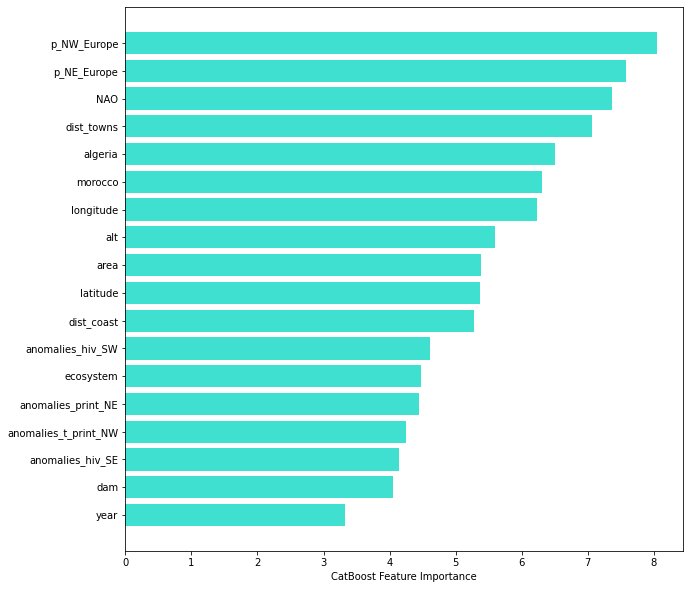

In [47]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.figure(figsize=(10,10))
plt.barh(data.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# **Conculsion**

In this notebook, we tried to predict the count of "canard souchet" in Morocco & Algeria regions. First, we visualized the data to have an idea about what we're dealing with. We found that the target variable is zero-inflated ( contains many zero values), which led us to read some articles about how to deal with Zero-inflated target in regression problems. In this context, we learned that linear models can handle this type of problems only if they were plugged in a pipeline with a classifier using ZeroInflatedRegressor, sklego ( model explained above). For Tree based, bagging and boosting models, they can handle this type of data without any problem. In terms of "work on data", we couldnt do alot of things which may be the problem in our analysis ( why we didnt achieve a better mae score than ~360), grosso modo, we removed raws where morocco = algeria = 0, we descovered that these observations belongs to Tunisia which make no sense to keep them since we r interested in Morocco&Algeria regions. We thought about removing somefeatures (feature selection) but we didnt have time to do it since we were focused alot on modeling and impelementing zero inflated model and integrate poissson regression in models when it s possible. reference : the article of the first week.
For modeling, we tried to cover the maximum possible using different types : linear, tree based, bagging, boosting. We tuned hyperparamters using GridSearchcv for some models ( we could try also RnadomizedSearch and Bayesian Optimization methods but we didnt find time to do it). In terms of results, we could achieve a mean absolute error ~ 360. In details : 

- XGBoost with Poisson regression for count data : 360.828
- AdaBoost with SVM Regressor : 360.315
- Zero-Inflated model with SVM classifier and SVM regressor : 360.390
- Zero-Inflated model with Naive Bayes classifier and SVM regressor :360.356

Based on these results, we can't say that a model is better than another, because the score stay in the same range and it's not something we can say that we are proud of. Above, you can find features importances using CatBoost to have an idea about how much features contribute in prediction ( we couldnt do more after :( )

To finish, we just wanna say that we really appreciate the quality of project you proposed in the last two weeks, because we learned alot and we r proud of this fact. Thank you !

